# Introduction
For this project, I want to look at police shootings over time. It feels like police violence and protests for police violence come in waves, so I want to see if there is any correlation between timing and police shootings. For this project, I want to 1) see if there is an increase in shootings over election years compared to others. Does 2016,2020 and 2024 seem to have more shootings then others. Both overall and for specific races. Then 2) is there a correlation between time period of the year and number of shootings. From this, I hope to discover if there are waves in shootings that tend to rise during certain years and seasons, or is it pretty consistent and its potentially more of the media and politicians that highlighting the shootings during certain periods. 

# Import Utilization Tools
Run cell before starting any code

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Import
This code imports data file into the variable crime_statistics. Displays first 5 rows.

In [5]:
crime_statistics = pd.read_csv("2024-07-23-washington-post-police-shootings-export.csv", parse_dates=True)

crime_statistics.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


# Check To See If There Are Any Empty Data 
Want to check and see if there are any empty data slots in our columns and rows. Allow us to see if there is missing data in important columns

In [7]:
missing_values = crime_statistics.isnull().sum()

print(missing_values[missing_values > 0])

name                            337
age                             384
gender                           28
armed                           211
city                             72
flee                           1345
police_departments_involved       1
dtype: int64


# Data Pre-Processing
Before we go an start moving out data around and creating models, I want to fill the desired null columns to make sure later on we do not have to deal with null conversions. The data I will clean will be age, gender, and armed. I will convert the date column to date time format as well.

### Check Column DataType

In [10]:
crime_statistics.dtypes

date                            object
name                            object
age                            float64
gender                          object
armed                           object
race                            object
city                            object
state                           object
flee                            object
body_camera                       bool
signs_of_mental_illness           bool
police_departments_involved     object
dtype: object

### Drop Unneeded Columns

In [12]:
drop_columns = ['name','age','gender','armed','city','state','flee', 'body_camera', 'signs_of_mental_illness','police_departments_involved']
crime_statistics.drop(columns=drop_columns, inplace=True)
crime_statistics.head()

,date,race
0,2015-01-02,White
1,2015-01-02,Asian
2,2015-01-03,Hispanic
3,2015-01-04,White
4,2015-01-04,Hispanic


### Convert Date Column to DateTime
Here, I convert the date column to datetime format for later graphs to use

In [14]:
crime_statistics['date'] = pd.to_datetime(crime_statistics['date'])
print(crime_statistics.dtypes)

date    datetime64[ns]
race            object
dtype: object


## 1. Police Shooting Totals Over the Years

In [16]:
shootings_year = crime_statistics
shootings_year['year'] = shootings_year['date'].dt.to_period('Y')
yearly_counts = shootings_year.groupby('year').size()
yearly_counts

year
2015     995
2016     959
2017     984
2018     992
2019     996
2020    1020
2021    1050
2022    1095
2023    1161
2024     641
Freq: Y-DEC, dtype: int64

Text(0.5, 1.0, 'Police Shootings Per Year')

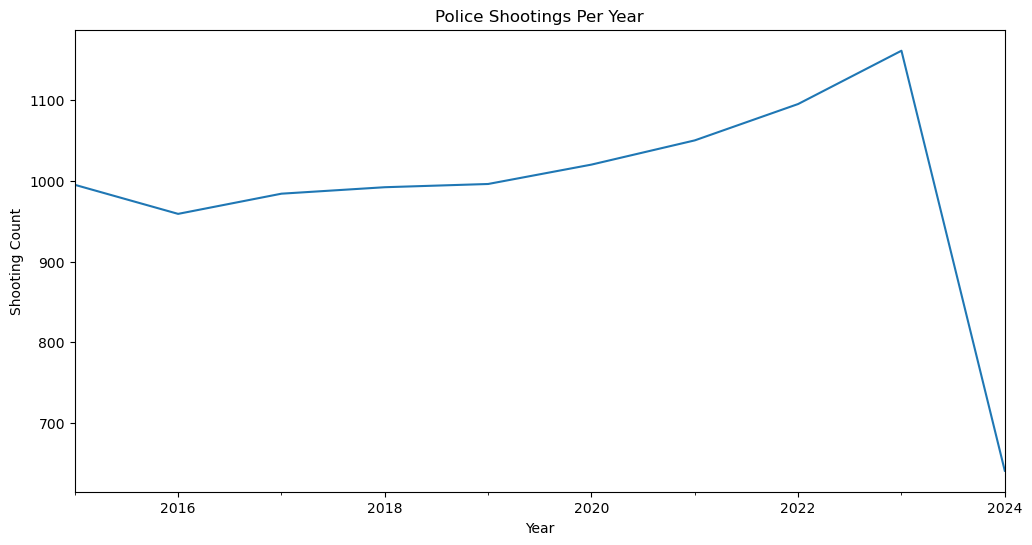

In [17]:
plt.figure(figsize=(12,6))
yearly_counts.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Shooting Count')
plt.title('Police Shootings Per Year')

Note the dip in 2024 is due to data being until mid July of 2024. There is not a full year of data yet for this year. 

Text(0, 0.5, 'Number of Shootings')

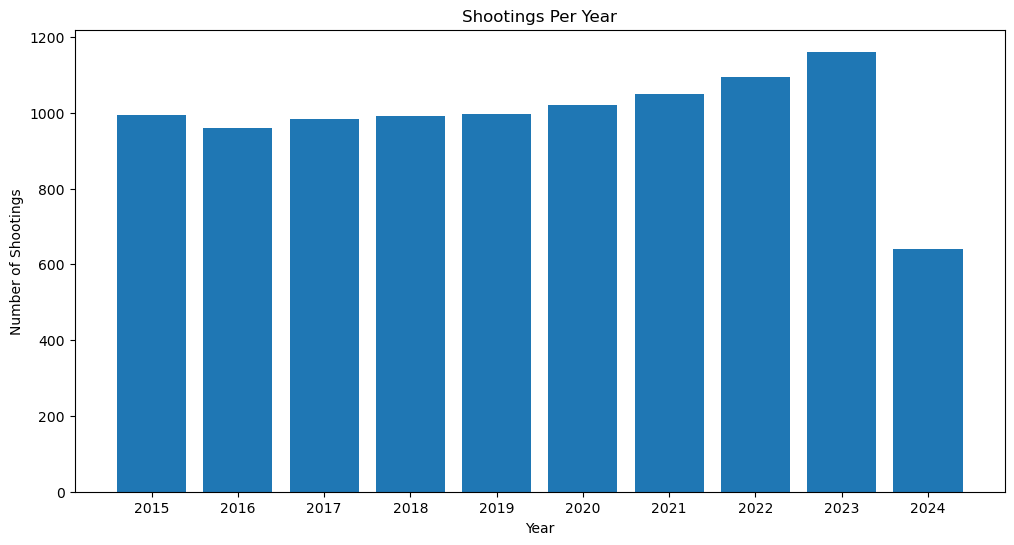

In [19]:
plt.figure(figsize=(12,6))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values)
plt.title('Shootings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')

### Report
From these two graphs, we actually do not see a trend in an increase in shootings for election years for all races. Instead, it appears that since 2016, the total number of reported police shootings have been slowly increasing until 2023 (with 2024 data not fully in yet until after the year closes). Even more concerning, the rate of which it is increasing is noticably higher from 2019-2023 as compared to 2015-2019. These 2 graphs here, go against my potential claim of media sensualizing police shootings around election time. Instead we see the graph is not consistently the same throughout the years, but that there appears to be an increasing rate of police shootings in the US nationally per year. 

## 2. Police Shootings Per Year Per Race

In [22]:
shootings_per_race = crime_statistics
shootings_per_race['year'] = shootings_per_race['date'].dt.year
shootings_per_race

,date,race,year
0,2015-01-02,White,2015
1,2015-01-02,Asian,2015
2,2015-01-03,Hispanic,2015
3,2015-01-04,White,2015
4,2015-01-04,Hispanic,2015
...,...,...,...
9888,2024-07-13,Unknown,2024
9889,2024-07-15,Unknown,2024
9890,2024-07-15,White,2024
9891,2024-07-15,White,2024


In [23]:
primary_race = ['White','Black','Native American', 'Hispanic', 'Unknown']
shootings_per_race['race'] = shootings_per_race['race'].apply(lambda x: x if x in primary_race else 'Other')
shootings_per_race

,date,race,year
0,2015-01-02,White,2015
1,2015-01-02,Other,2015
2,2015-01-03,Hispanic,2015
3,2015-01-04,White,2015
4,2015-01-04,Hispanic,2015
...,...,...,...
9888,2024-07-13,Unknown,2024
9889,2024-07-15,Unknown,2024
9890,2024-07-15,White,2024
9891,2024-07-15,White,2024


In [24]:
race_counts = shootings_per_race.groupby(['year','race']).size().reset_index(name='count')
race_counts.head()

,year,race,count
0,2015,Black,258
1,2015,Hispanic,176
2,2015,Native American,10
3,2015,Other,27
4,2015,Unknown,19


Text(0, 0.5, 'Total Number of Shootings')

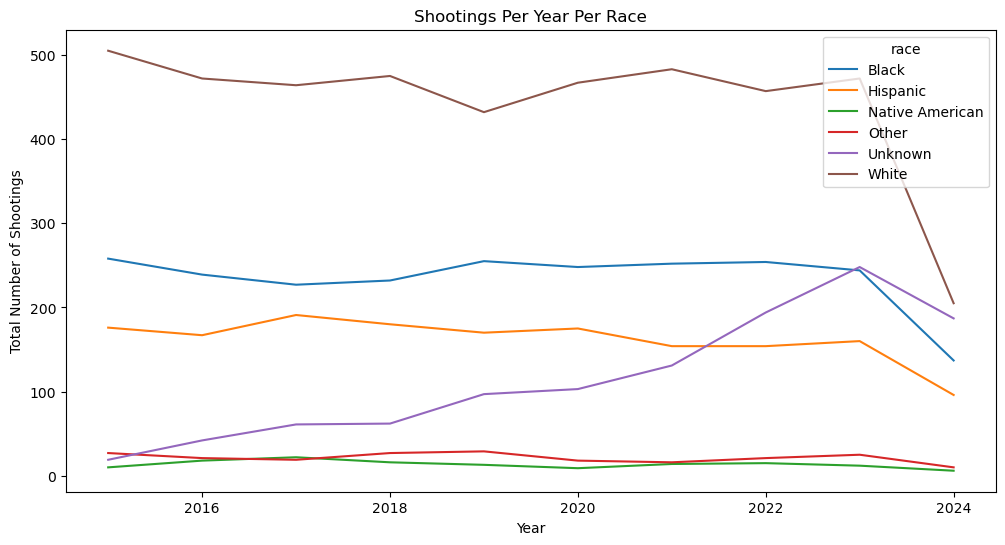

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='count',hue='race', data=race_counts)
plt.title('Shootings Per Year Per Race')
plt.xlabel('Year')
plt.ylabel('Total Number of Shootings')

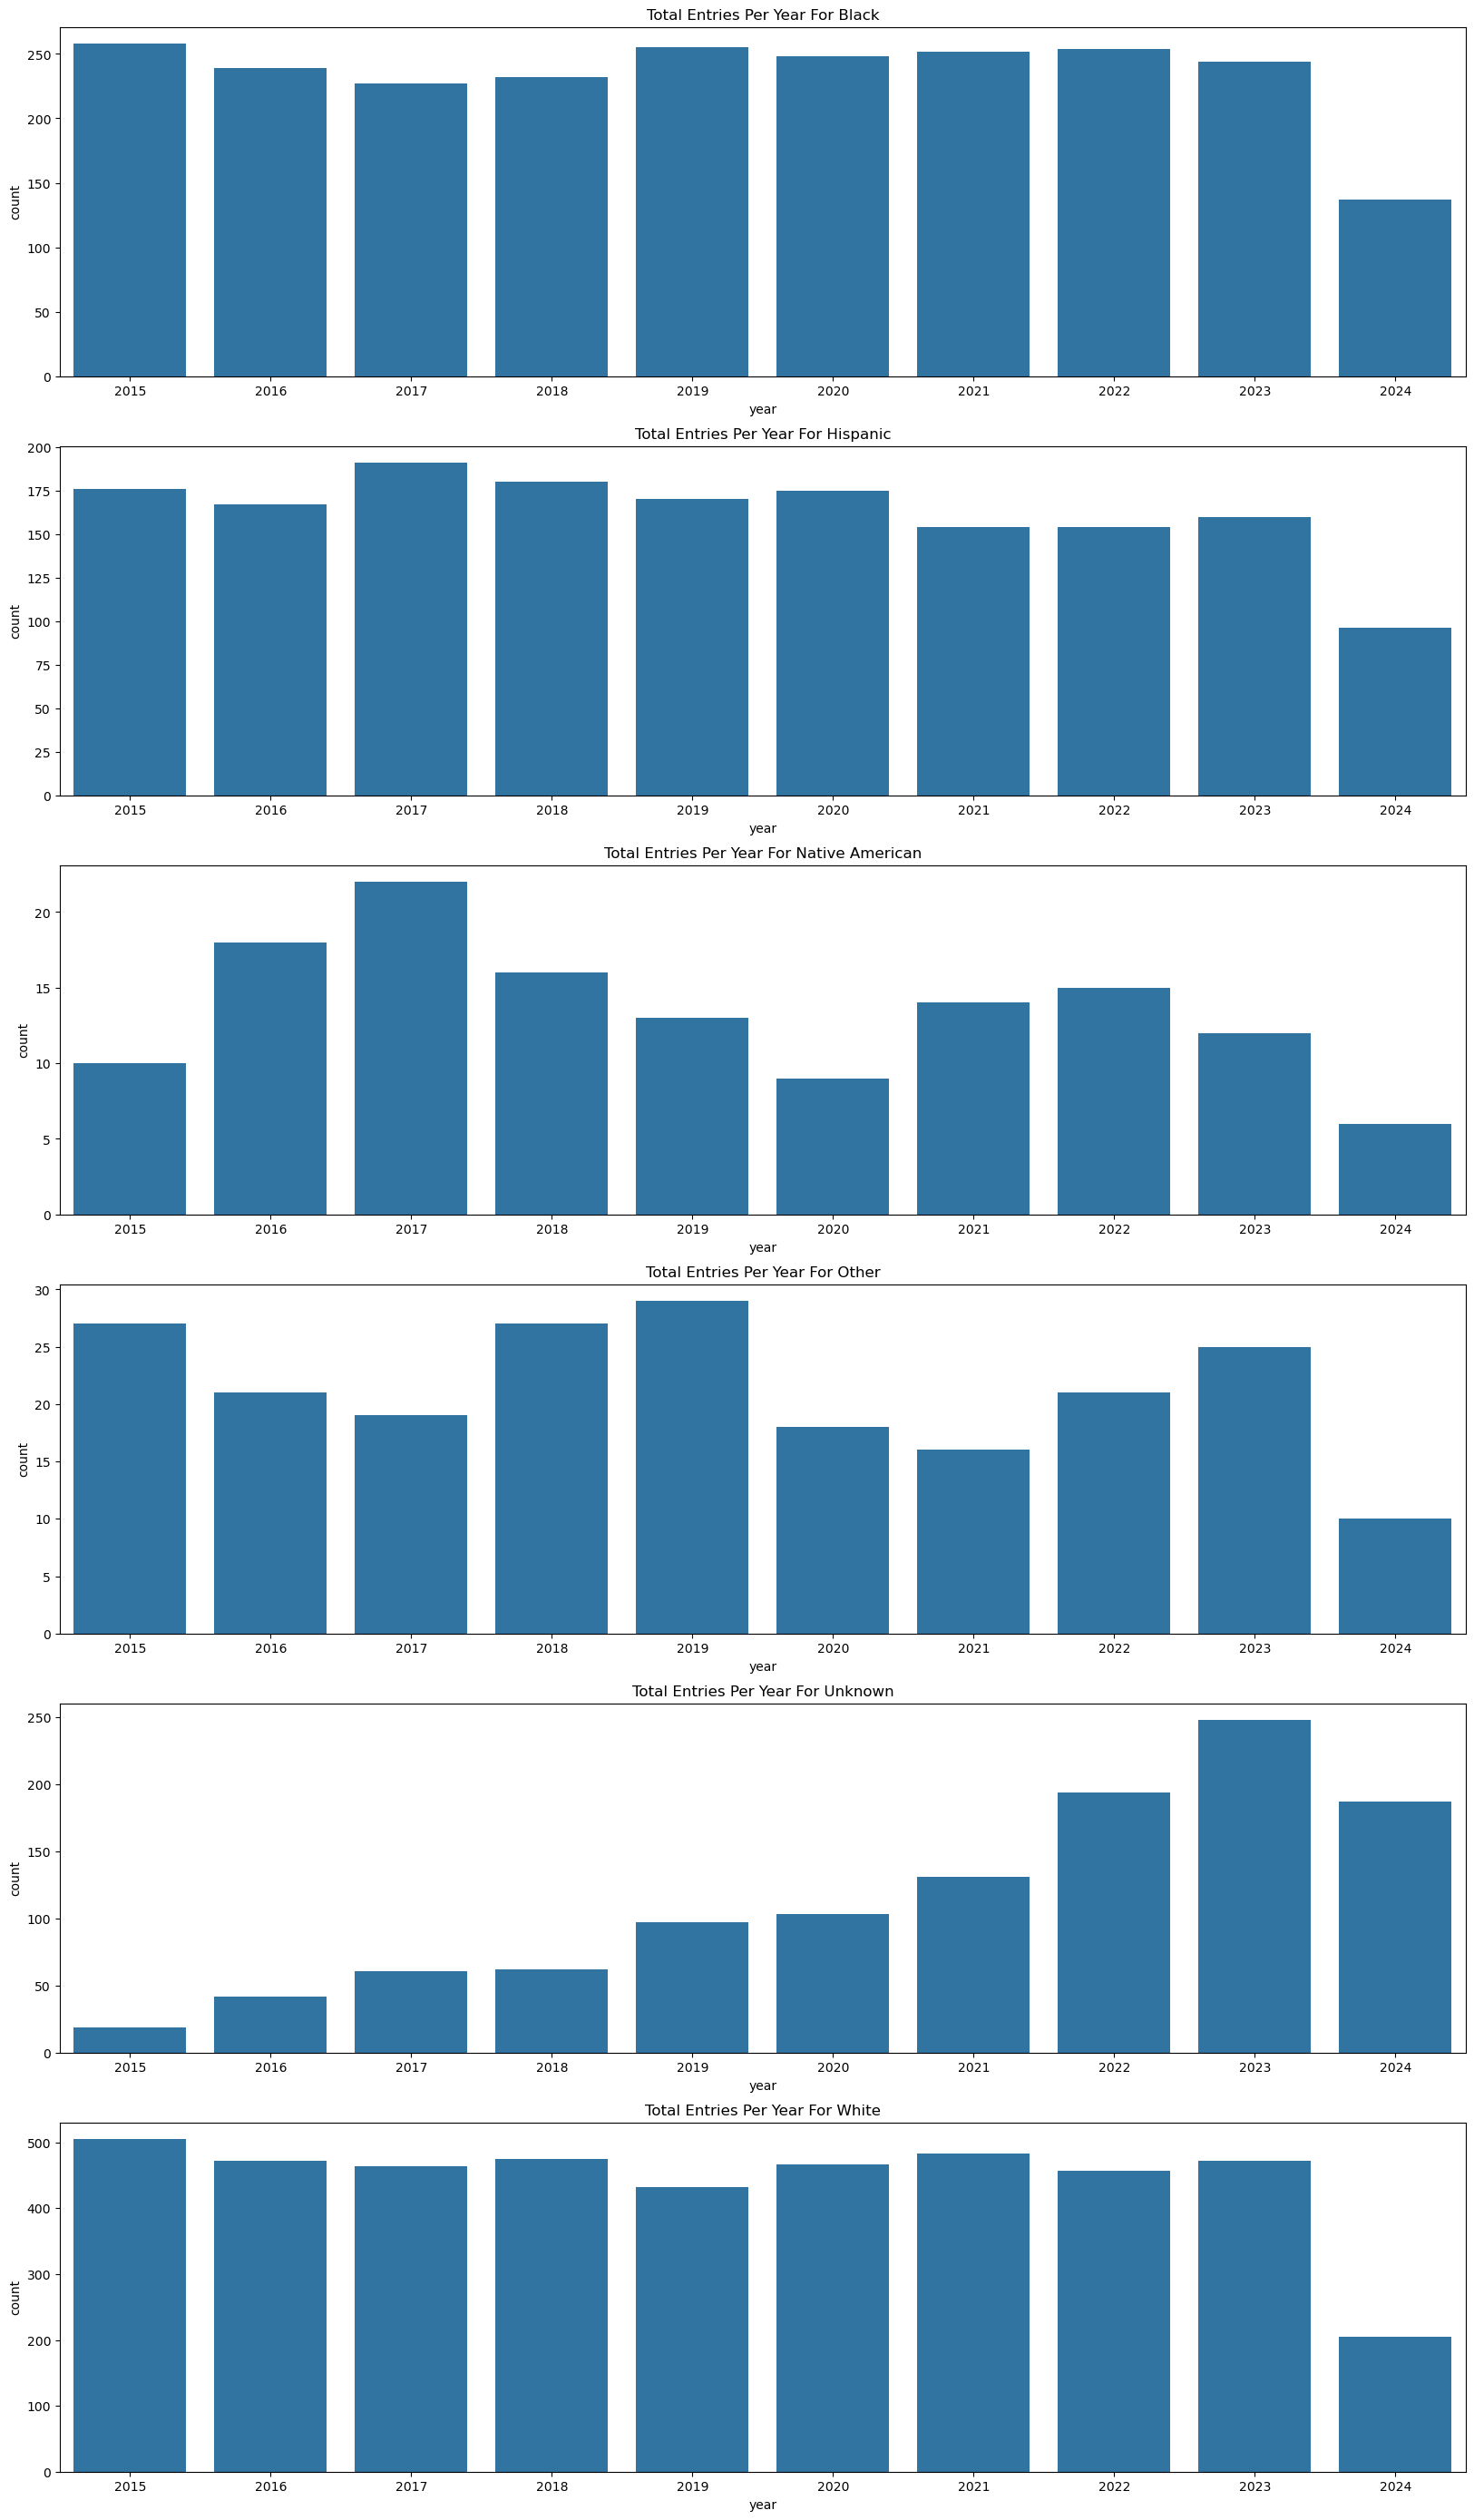

In [26]:
races = race_counts['race'].unique()
fig, axes = plt.subplots(nrows=6,ncols=1, figsize=(20,35))

for idx, race in enumerate(races):
    race_data = race_counts[race_counts['race'] == race]
    sns.barplot(x='year',y='count',data=race_data, ax = axes[idx])
    axes[idx].set_title(f'Total Entries Per Year For {race}')

### NOTICE
It's very important to note, before going into this report, that these tables do not hold the same range on the y axis. If you look at the y-axis for the native americans and the white population, the native americans are being measured on a scale of 0-20 while the the white axis goes from 0-500. The point of this section is NOT to compare the races to eachother. Instead, it is to look solely at the race at hand and potentially highlight or visualize any trends within that particular race. It is also important to point out, that the race categories go based on what you predominatly are, so the category other tends to contain both mixed races as well as races committing smaller amounts (for example, asians). The unknown category is for when the race was not given to us. So we cannot put them into any other group. 

### LinePlot Report
When looking at the lineplot, that graph gives us a good visual on both the trend and how the shootings match up to other races. We see here the White population tends to have a higher amount of police shooting victims compared to other races. Followed then by Black, then Hispanics. There is a noticeable gap between the White and Black population, anywhere from 150-200 victims in a given year. The Black and Hispanic group started out relatively similar, but from about 2017 to 2023, the gap has grown ever so slightly. The other and Native American category have relatively minimal victims, consistently staying below 30 reported incidences in a year. What is very surprising, is that the unknown category has begun to spike in recent years. I wonder why we would have victims without known race. Neverthless, that trend is very concerning as per 2023 we had more reported police shootings involving an unknown race then someone who identified as Black, which was in second. In 2015 when this data began being counted, the unknown catgeory would have come in 5th, but as of 2023 it has jumped all the way to second, with the first place White and former second place Black races being somewhat similar over time. From this lineplot, I believe there needs to be more research and investigation into why we have so many in the unknown category. Because if it is covering up a certain race group, that could greatly influence the data.

### BarGraph Report

#### 1. Black

When looking at the black population, they have remained relatively even throughout the 9 full years. In fact, the 2015 count is slightly larger then then 2023 count. There is also no indication of there being an increase in occurrences during or around election year. Looking around the years 2015-2016, 2019-2020 and 2023, there is no real spike or change that would be worth noting. Every year seems to be within 25-30 victims of eachother, with no increase overall.

#### 2. Hispanic

The Hispanic population also shows no trends around election time, with 2015 being higher then 2016. And 2017 being higher then 2020. The only trend the hispanic population has shown is a relative decrease in total victims over the years. Ever since 2017, the Hispanic population has had an overall negative slope. With no other trends, we can say that election does not appear to affect this group either.

#### 3. Native American

When looking at the Native American bar graph, it would appear it has a chaotic amount of change over the years. Relative to the group, that is true, but overall it is important to note that the change is around 10 people. With the most reported amount within a year being a little over 20, and the smallest amount being about 10. Again though, this graph shows no trend between election years and police shooting incidents. In fact, 2020 was among one of the lower shooting years (although Covid may have played a role into that, as besides 2020, 2018-2023 have been relatively similar). So again with Native Americans, there is no trend around the election, and it appears that there was a peak in 2017 which we have since remained below.

#### 4. Other

For the other group, this tends to be any documented group not apart of the big 4. This group again shows no correlation between election time and police shootings. In fact, the highest amount of police shootings occurred the year before the 2016 and 2020 election. For the other category, there doesn't appear to be any trends worth noting. Also would like to point out that for the other category we are dealing with a much smaller size range compared to some of the other races. But when it comes to potential elections increasing victims, there is no evidence of that from this graph.

#### 5. Unknown

The unknown category has to be the most alarming group out of the bunch. First, you have to wonder how there can be so many people whose race is unknown. Secondly, since 2015 every year this category is increasing, with it rising from 5th out of the 6 major categories in the group in 2015 to 2nd overall as of 2023. And this is without any of the categories moving drastically. This is the only category with an increasing slope, and it appears to be looking exponential as of now. In order to understand why this category is shifting so much, I believe we first have to understand and know which ethnic group is making up these numbers. In 2015, this category would not have much affect on the other races numbers, but with nearly 250 victims in 2023, if there is a certain race that makes up majority of this group, it could greatly affect this data. As per election years, the graph for this category appears to be increasing every year, regardless of whether its election year or not. So we cannot say the election messes with this group.

#### 6. White

In terms of the individual races, this group has the highest number of shot victims. However, once again there appears to be no trend or movement linked to elections. In fact, in 2015 there appears to be around 500 shot victims, and in 2023 there appears to be around 475 victims. Over the stretch, there is not much movement, besides an ever so slight decrease in yearly numbers. And once again, there is no unordinary movement around election time, if anything slightly less than usual. 

## 3. Shootings By Month

In [43]:
shootings_per_month = crime_statistics
shootings_per_month

,date,race,year
0,2015-01-02,White,2015
1,2015-01-02,Other,2015
2,2015-01-03,Hispanic,2015
3,2015-01-04,White,2015
4,2015-01-04,Hispanic,2015
...,...,...,...
9888,2024-07-13,Unknown,2024
9889,2024-07-15,Unknown,2024
9890,2024-07-15,White,2024
9891,2024-07-15,White,2024


In [44]:
shootings_per_month['month'] = shootings_per_month['date'].dt.month
shootings_per_month

,date,race,year,month
0,2015-01-02,White,2015,1
1,2015-01-02,Other,2015,1
2,2015-01-03,Hispanic,2015,1
3,2015-01-04,White,2015,1
4,2015-01-04,Hispanic,2015,1
...,...,...,...,...
9888,2024-07-13,Unknown,2024,7
9889,2024-07-15,Unknown,2024,7
9890,2024-07-15,White,2024,7
9891,2024-07-15,White,2024,7


In [45]:
shootings_per_month = shootings_per_month[shootings_per_month['date'].dt.year != 2024]
shootings_per_month

,date,race,year,month
0,2015-01-02,White,2015,1
1,2015-01-02,Other,2015,1
2,2015-01-03,Hispanic,2015,1
3,2015-01-04,White,2015,1
4,2015-01-04,Hispanic,2015,1
...,...,...,...,...
9247,2023-12-29,White,2023,12
9248,2023-12-29,Unknown,2023,12
9249,2023-12-31,White,2023,12
9250,2023-12-31,Hispanic,2023,12


In [46]:
month_counts = shootings_per_month.groupby('month').size()
month_counts

month
1     787
2     762
3     829
4     743
5     757
6     784
7     769
8     801
9     697
10    785
11    740
12    798
dtype: int64

<Axes: title={'center': 'Police Shooting Per Month(2015-2023)'}, xlabel='month', ylabel='Count'>

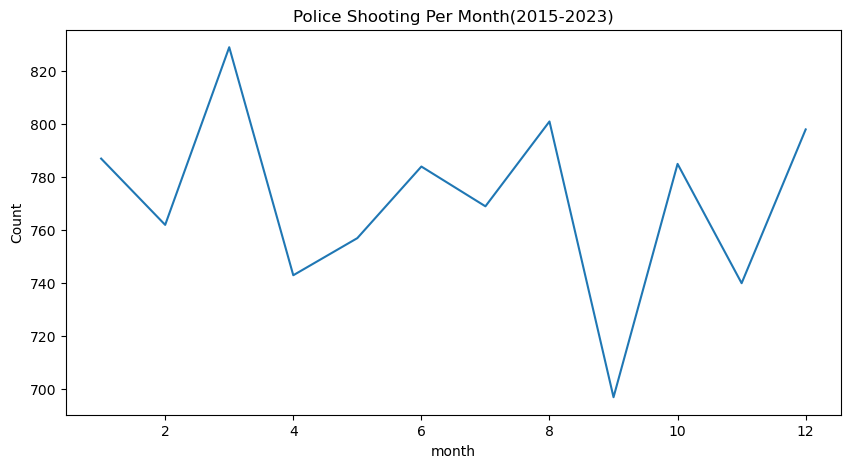

In [47]:
plt.figure(figsize=(10,5))
plt.title('Police Shooting Per Month(2015-2023)')
plt.xlabel('Month of the Year')
plt.ylabel('Count')
month_counts.plot(kind='line')

<BarContainer object of 12 artists>

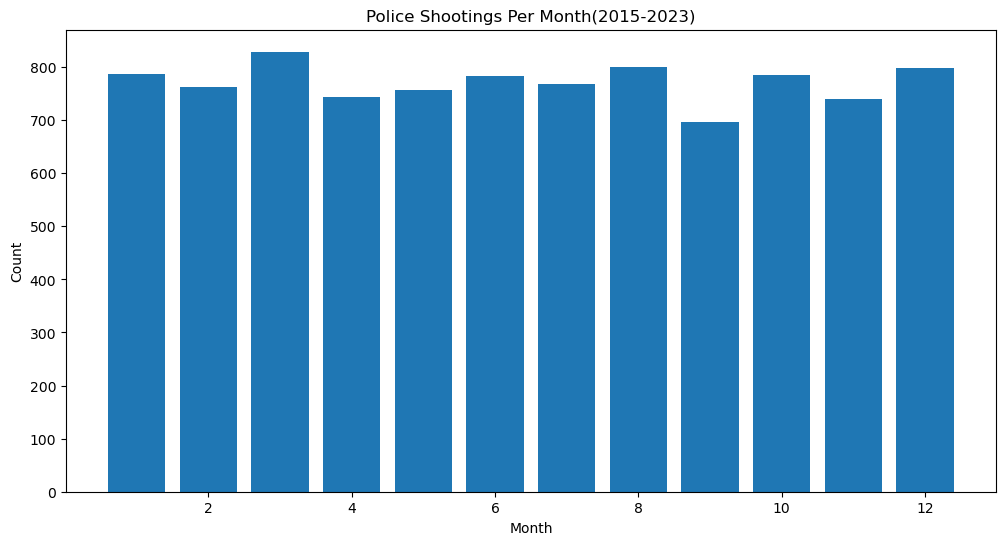

In [48]:
plt.figure(figsize=(12,6))
plt.title('Police Shootings Per Month(2015-2023)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.bar(x=month_counts.index,height=month_counts.values)

### Report
When looking at the total number of police shootings per month, we once again find no correlation between possible elections and rise in numbers. In fact, the line graph shows a potential opposite trend. November, being the election month, is one of the lowest months over the past 9 years for police shooting victims. Even September, a month leading up very close to the election, is the lowest out of the 12 states. So from the graphs provided here, we cannot say that election time could cause a spike in shootings. Of course, this isn't comparing the months to each other over each year, but overall, there is no trend from the data here to suggest that election time (or election months) would be a cause for increase in police violence. 

## 4. Final Report

The hope from this report would be to see if elections, both months and years, cause a spike in police shootings either overall or for a particular race. We investigated total number of police shootings over a 9.5 year stretch in the hopes of finding spikes or trends around election time, and found none. We looked over for each race over time to see if there were any trends around election time, and once again were unable to find a consistent trend. We also looked at months to see if the "election months" September-November would have a spike, but once again the data did not prove that. From my report I can confidently say that election years, or "election time" do not bring about a higher number of police shootings. Overall, the police shootings seems to be fairly consistent with any trend. For overall shootings, since 2015 the total number has slowly increased almost every year until 2023, with only a slight increase in the amount per year. When it comes to particular race, every documents race has seemed to stay pretty consistent over the 9 year stretch, with no jumps around election time. Now, the only concern from this dataset was the amount of unknown races being registered, and how the incidents for the unknown race was rising with every given year. For all we know, hundreds of a particular race could be hidden in this category that could change the narrative. But even this category showed no trends around election time, but instead had a trend of increasing by a little more every year. But, the same primary goal of seeing a correlation betweem election time and police shootings proved to by unrelated. So, bigger picture outside my scope. When it comes to the media's reporting of police shootings, we see that the number increases ever so slightly every year. So we can say if it feels like police shootings are getting a lot of media coverage, and feels like they are happening more then normal.